In [253]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [254]:
# load package for loading data
import pandas as pd

In [255]:
housing_dataset = pd.read_csv('./boston_housing.csv')
housing_dataset 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [256]:
X = housing_dataset['RM'].to_numpy().reshape(-1, 1)
y = housing_dataset['MEDV'].to_numpy()

In [257]:
# load package for spliting data

from sklearn.model_selection import train_test_split

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Visualization

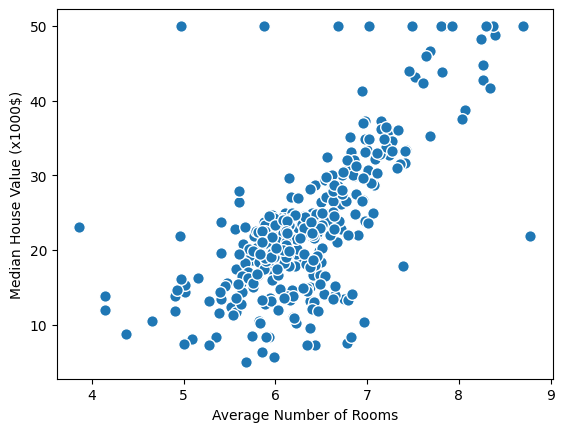

In [259]:
# visualize data
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.show()

### Linear Regression (Base)

In [260]:
class LinearRegression:
    def __init__(self):
        self.w = None

    def predict(self, X):
        return X @ self.w[1:] + self.w[0]

    def fit(self, X, y):
        pass

### Gradient Descent

In [261]:
class GradientDescent(LinearRegression):
    def __init__(self, eta=0.001, max_iter=20, random_state=42):
        super().__init__()
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.costs = []
        self.intercept_ = None
        self.coef_ = None

    def fit(self, X, y):
        # Initialize weight values
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])

        self.costs = []
        for _ in range(self.max_iter):  # For each iteration,
            y_pred = self.predict(X)  # Predict output of X
            diff = y - y_pred  # Compute the differences

            self.w[0] += self.eta * np.sum(diff)  # Update intercept
            self.w[1:] += self.eta * np.dot(X.T, diff)  # Update coeff

            J = 1/2 * np.sum(diff ** 2)  # Compute cost value
            self.costs.append(J)  # Store cost value at ith-iteration

        self.intercept_ = self.w[0]
        self.coef_ = self.w[1:]

- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

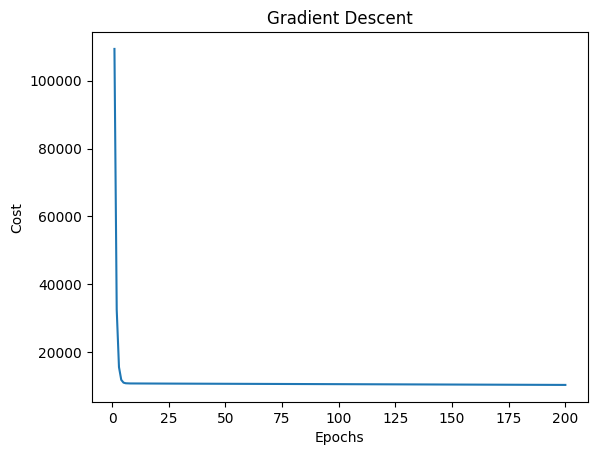

In [262]:
# With learning rate = 1e-2, 1e-3 the loss function is not convergent
# due to overflow error when computing the cost value

# Initialize the model
reg_GD = GradientDescent(eta=0.0001, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data

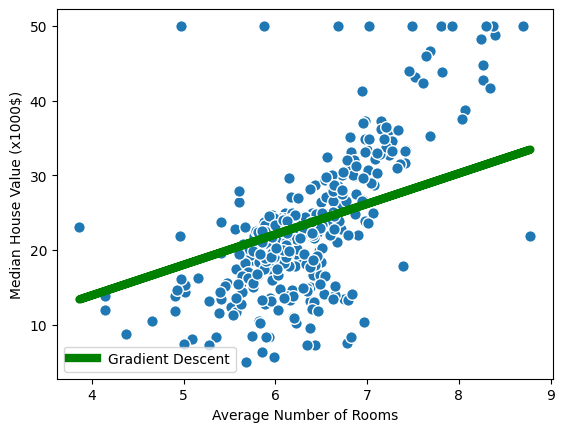

In [263]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [264]:
class StochasticGradientDescent(GradientDescent):
    def __init__(self, eta=0.001, max_iter=20, random_state=42):
        super().__init__(eta, max_iter, random_state)
        self.intercept_ = None
        self.coef_ = None

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])
        self.cost_trend = []
        for _ in range(self.max_iter):
            J = 0.0
            for i, x in enumerate(X):  # Update weights for each sample instead of all samples
                y_pred = self.predict(np.array([x]))
                diff = y[i] - y_pred
                self.w[0] += self.eta * diff
                self.w[1:] += self.eta * x * diff
                J += 1/2 * diff ** 2
            self.cost_trend.append(J)

        self.intercept_ = self.w[0]
        self.coef_ = self.w[1:]

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [265]:
# Initialize the model
reg_SGD = StochasticGradientDescent(eta=0.00001, max_iter=200, random_state=42)

# Train model
reg_SGD.fit(X_train, y_train)

/tmp/ipykernel_639993/3240739050.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w[0] += self.eta * diff


Visualize the prediction of Stochastic Gradient Descent model on Training Data

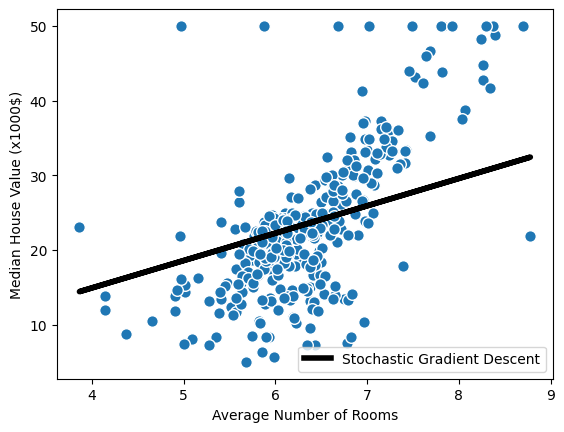

In [266]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [267]:
class NormalEquation(LinearRegression):
    def fit(self, X, y):
        self.w = (np.linalg.inv(X.T @ X) @ X.T) @ y
        self.intercept_ = self.w[0]
        self.coef_ = self.w[1:]

In [268]:
# Intialize the Normal Equation model
reg_NE = NormalEquation()

# Train model
reg_NE.fit(np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1), y_train)

Visualize the prediction of Normal Equation model on Training Data

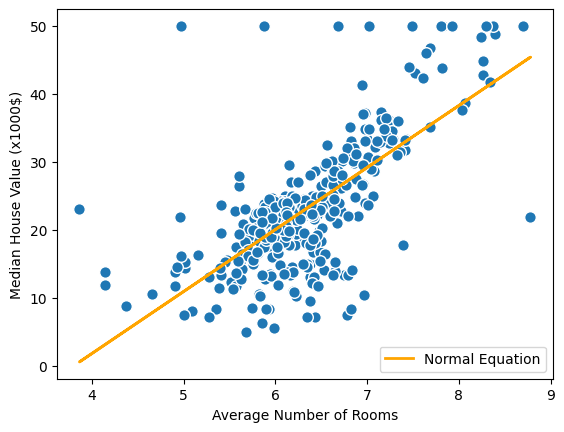

In [269]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

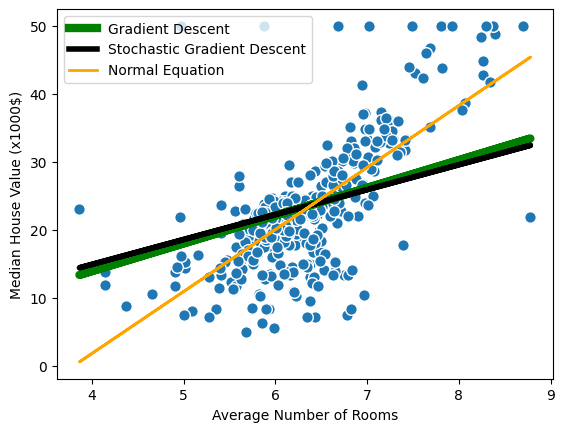

In [270]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [271]:
w_GD = reg_GD.w
w_SGD = reg_SGD.w
w_NE = reg_NE.w
print(w_GD)
print(w_SGD)
print(w_NE)

[-2.39730964  4.08082808]
[0.26100199 3.66368241]
[-34.66230744   9.1181022 ]


Performance Comparisons (on Testing Set)

In [272]:
y_pred_GD = reg_GD.predict(X_test)

In [273]:
y_pred_SGD = reg_SGD.predict(X_test)

In [274]:
np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1).shape

(152, 2)

In [275]:
y_pred_NE = reg_NE.predict(X_test)

In [276]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [277]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 5.280909
MAE of SGD: 5.401125
MAE of NE: 4.314224


In [278]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 52.518172
MSE of SGD: 54.559153
MSE of NE: 40.35145


In [279]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.295182
R2 of SGD: 0.267791
R2 of NE: 0.458465


## Experiment with Standardized Data

In [280]:
# Re-load the dataset
housing_dataset = pd.read_csv('./boston_housing.csv')

In [281]:
# load the package for standardizing data (Standard Scaler)

from sklearn.preprocessing import StandardScaler

In [282]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [283]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset['RM'].to_numpy().reshape(-1, 1)
y = housing_dataset['MEDV'].to_numpy()

In [284]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

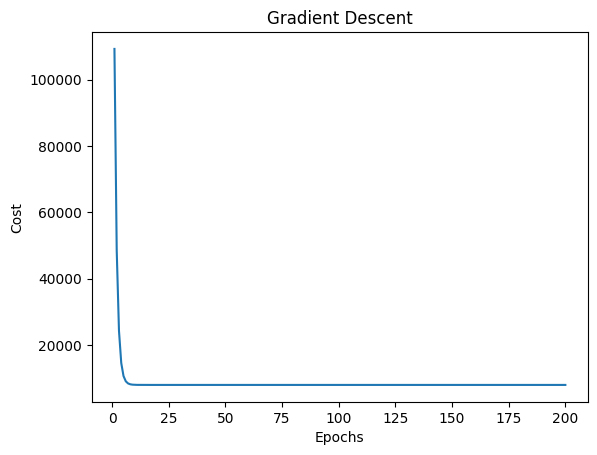

In [285]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = GradientDescent(eta=0.001, max_iter=200, random_state=42)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



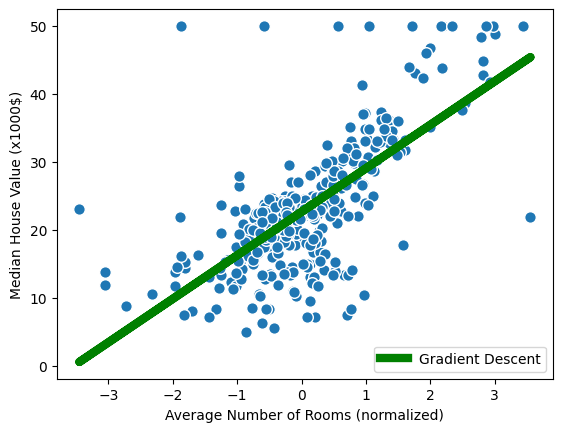

In [286]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [287]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = StochasticGradientDescent(eta=0.001, max_iter=200, random_state=42)

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

/tmp/ipykernel_639993/3240739050.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w[0] += self.eta * diff


Visualize the prediction of Stochastic Gradient Descent model on Training Data


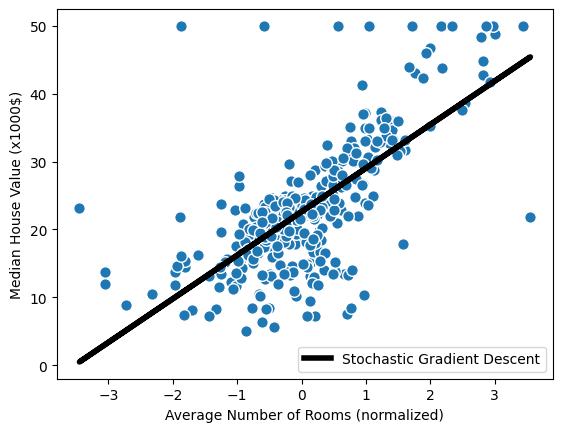

In [288]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [289]:
# Initalize the Normal Equation model
reg_NE = NormalEquation()

# Train model
reg_NE.fit(np.concatenate((np.ones((X_train_norm.shape[0], 1)), X_train_norm), axis=1), y_train)

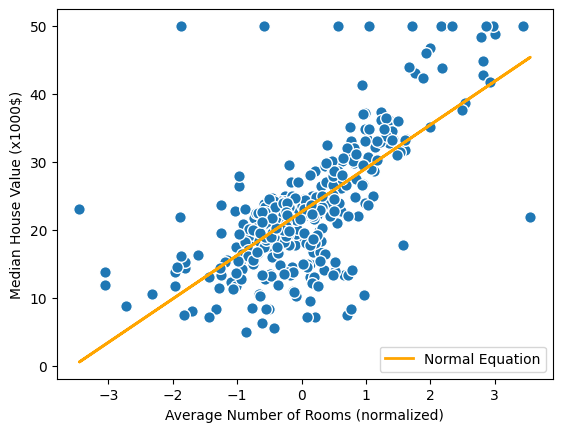

In [290]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

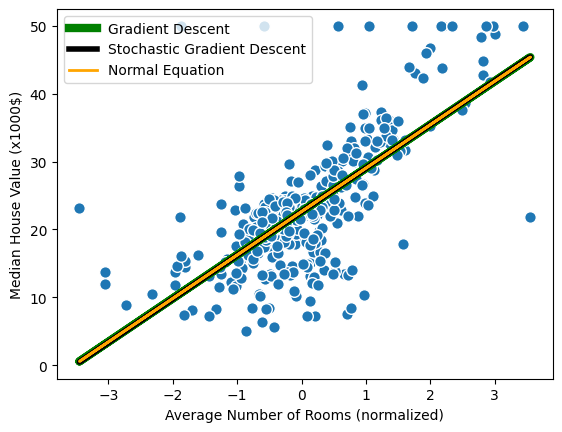

In [291]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [292]:
w_GD = reg_GD.w
w_GD

array([22.64163118,  6.40020122])

In [293]:
w_SGD = reg_SGD.w
w_SGD

array([22.6184944 ,  6.41615383])

In [294]:
w_NE = reg_NE.w
w_NE

array([22.64163118,  6.40020122])

In [295]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [296]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [297]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [298]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 4.314224
MAE of SGD: 4.311684
MAE of NE: 4.314224


In [299]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 40.35145
MSE of SGD: 40.336739
MSE of NE: 40.35145


In [300]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.458465
R2 of SGD: 0.458662
R2 of NE: 0.458465


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [301]:
# Re-load dataset
housing_dataset = pd.read_csv('./boston_housing.csv')

* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [302]:
X = housing_dataset.drop('MEDV', axis=1).to_numpy()
y = housing_dataset['MEDV'].to_numpy()

In [303]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

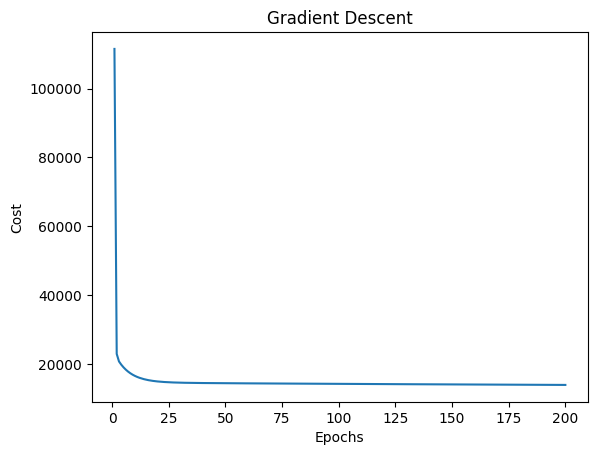

In [304]:
# The suitable learning rate is 1e-8
# other learning rates are not convergent due to overflow error when computing the cost value

# Initalize the GD model
reg_GD = GradientDescent(eta=0.00000001, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [305]:
# Initialize the SGD model
reg_SGD = StochasticGradientDescent(eta=0.00000001, max_iter=200, random_state=42)

# Train model
reg_SGD.fit(X_train, y_train)

/tmp/ipykernel_639993/3240739050.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w[0] += self.eta * diff


### Normal Equation

In [306]:
# Add the '1' column to data

X_train_new = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)

In [307]:
# Intialize the NE model
reg_NE = NormalEquation()

# Train model
reg_NE.fit(X_train_new, y_train)

### Algorithms Comparisons

In [308]:
w_GD = reg_GD.w
w_GD

array([ 5.52332725e-03, -1.00445650e-02,  4.01250629e-02,  1.00675028e-02,
       -1.98428582e-03, -2.18108357e-03,  2.21876484e-02,  1.02575199e-02,
       -1.72587285e-03,  2.86076003e-03, -1.75953448e-03, -2.76731132e-05,
        6.16464657e-02, -3.74414463e-02])

In [309]:
w_SGD = reg_SGD.w
w_SGD

array([ 5.52397001e-03, -1.00346256e-02,  4.01484103e-02,  1.00785636e-02,
       -1.98160370e-03, -2.18069189e-03,  2.21940773e-02,  1.02507786e-02,
       -1.72752686e-03,  2.86095744e-03, -1.58677268e-03, -2.38120893e-05,
        6.15661519e-02, -3.74571336e-02])

In [310]:
w_NE = reg_NE.w
w_NE

array([ 3.16310840e+01, -1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
        3.11983512e+00, -1.54170609e+01,  4.05719923e+00, -1.08208352e-02,
       -1.38599824e+00,  2.42727340e-01, -8.70223437e-03, -9.10685208e-01,
        1.17941159e-02, -5.47113313e-01])

In [311]:
y_pred_GD = reg_GD.predict(X_test)

In [312]:
y_pred_SGD = reg_SGD.predict(X_test)

In [313]:
y_pred_NE = reg_NE.predict(X_test)

In [314]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 6.391988
MAE of SGD: 6.402132
MAE of NE: 3.16271


In [315]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 70.066239
MSE of SGD: 70.076525
MSE of NE: 21.517444


In [316]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.059679
R2 of SGD: 0.059541
R2 of NE: 0.711226


## Experiment with Standardized Data

In [317]:
# Re-load dataset
housing_dataset = pd.read_csv('./boston_housing.csv')

In [318]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [319]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [320]:
X_new = housing_dataset.drop('MEDV', axis=1).to_numpy()
y = housing_dataset['MEDV'].to_numpy()

In [321]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

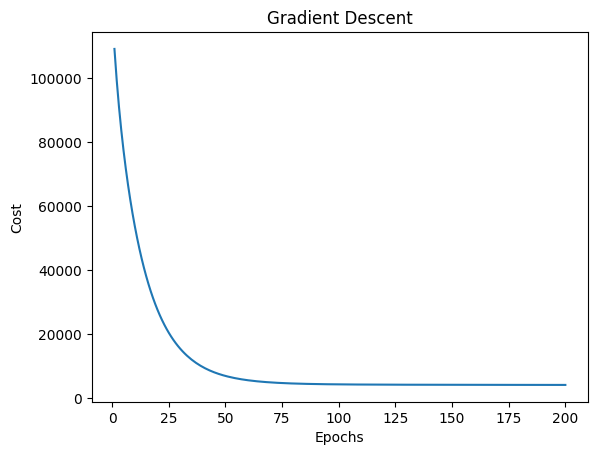

In [322]:
# Initalize the GD model
reg_GD = GradientDescent(eta=0.0001, max_iter=200, random_state=42)

# Train model on normalized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [323]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = StochasticGradientDescent(eta=0.0001, max_iter=200, random_state=42)

# Train model
reg_SGD.fit(X_train_norm, y_train)

/tmp/ipykernel_639993/3240739050.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w[0] += self.eta * diff


### Normal Equation (sklearn)

In [324]:
# Initialize NE model
reg_NE = NormalEquation()

# Train model
reg_NE.fit(np.concatenate((np.ones((X_train_norm.shape[0], 1)), X_train_norm), axis=1), y_train)

### Algorithms Comparisons

In [325]:
w_GD = reg_GD.w
w_GD

array([22.4771051 , -0.94634802,  0.40285729, -0.05154522,  0.86403959,
       -1.10952874,  3.09171073, -0.39324812, -2.23150523,  0.88239876,
       -0.32128136, -1.86670471,  1.09814471, -3.79012233])

In [326]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([22.47318336, -0.94311207,  0.40184264, -0.04973249,  0.86867285,
       -1.10904141,  3.09233614, -0.3923025 , -2.23214059,  0.88540727,
       -0.3189362 , -1.86600549,  1.09752771, -3.78843862])

In [327]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.50945471, -1.14691411,  0.83432605,  0.33940694,  0.79163612,
       -1.784727  ,  2.84783949, -0.30429306, -2.91562521,  2.11140045,
       -1.46519951, -1.9696347 ,  1.07567771, -3.90310727])

In [328]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [329]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [330]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [331]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 3.207306
MAE of SGD: 3.205044
MAE of NE: 3.16271


In [332]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 22.914828
MSE of SGD: 22.904803
MSE of NE: 21.517444


In [333]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.692472
R2 of SGD: 0.692607
R2 of NE: 0.711226


# Explain what $R^2$ coefficient is.


\begin{gather*}
R^{2} =1-\frac{RSS}{TSS} =\frac{\sum _{i=1}^{N}( y_{i} -\hat{y}_{i})^{2}}{\sum _{i=1}^{N}( y_{i} -\overline{y})^{2}}\\
\end{gather*}

$RSS: $ Residual Sum of Square \
$TSS: $ Total Sum of Square \
$y:$ Actual value \
$\hat{y}:$ Predicted value \
$\bar{y}:$ Mean value \
$N$: Number samples \
$R^{2}:$ Coefficient r-quare


The most common interpretation of r-squared is **how well the regression model explains observed data**. It can be defined as (total variance explained by model) / (total variance).

- In most of cases, low value of $\displaystyle R^{2}$ show a level of correlation, or model is not valid
- In most of cases, the higher value of $\displaystyle R^{2}$, the better the model is


